In [12]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats
import sys
import os
from importlib import reload
from tqdm import tqdm
import pickle5 as pickle


#################### Figure settings
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)

area=4.0;linethicknes=1.0;

font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42


#####################  Import code
sys.path.insert(0, './../../DataAndScripts/structured_scripts/')

import functions_optimal as funopt
import functions as fun
import data_analysis as da
import sims_utils as su
import validate_utils as vu
import load_utils as lu
import plot_functions as pl
import ricciardi_class as ric
ri = ric.Ricciardi()
ri.set_up_nonlinearity()
import network as network
reload(vu)
reload(pl)


/Users/agos/Dropbox/ColumbiaProjects/Code_Reshuffling_Github/2-SuppFigures/Supp_Figure_4_agos


<module 'plot_functions' from './../../DataAndScripts/structured_scripts/plot_functions.py'>

# Load data class

In [6]:
data=da.Data_MonkeyMouse('both','./../../DataAndScripts/experimental_data/')
dataset=data.bootstrap_moments[1]

# Get best fit parameters

In [8]:
with open('./best_fit_params/Model_Fit_Separately_StructModel-Best.pkl', 'rb') as handle:
    comb_fit = pickle.load(handle)
    
fit_preds = {}
fit_params = {}
fit_rX = {}

for anim_idx in range(2):
    fit_preds[anim_idx] = comb_fit['predictions_of_r_sim_'+data.this_animals[anim_idx]]
    fit_params[anim_idx] = np.concatenate(([0,500,0.09,30,1e-3,200],
                                           comb_fit['best_params_'+data.this_animals[anim_idx]]))
    fit_rX[anim_idx] = comb_fit['best_rXs_'+data.this_animals[anim_idx]]


# Plot best fit

In [ ]:

# pl.plot_best_preds_from_validate_param({0:[[np.array([fit_preds[0]])]+[np.zeros((0,6,7))]*6][0],
#                                         1:[[np.array([fit_preds[1]])]+[np.zeros((0,6,6))]*5][0]},
#                                        with_contrast=True)

# Set up best fit parameters

In [13]:
seeds=[1,3,5,7]
max_min=15

seed_con = fit_params[1][vu.res_param_idxs_fixed['seed_con']]
KX       = fit_params[1][vu.res_param_idxs_fixed['KX']]
pmax     = fit_params[1][vu.res_param_idxs_fixed['pmax']]
SoriE    = fit_params[1][vu.res_param_idxs_fixed['SoriE']]
Lam      = fit_params[1][vu.res_param_idxs_fixed['Lam']]
Tmax_over_tau_E =fit_params[1][vu.res_param_idxs_fixed['Tmax_over_tau_E']]

T = np.arange(0,1.5*Tmax_over_tau_E*ri.tau_E,ri.tau_I/3);
mask_time=T>(0.5*Tmax_over_tau_E*ri.tau_E)

J         = fit_params[1][vu.res_param_idxs['J']]
GI        = fit_params[1][vu.res_param_idxs['GI']]
gE        = fit_params[1][vu.res_param_idxs['gE']]
gI        = fit_params[1][vu.res_param_idxs['gI']]
beta      = fit_params[1][vu.res_param_idxs['beta']]
rX        = fit_rX[1][-1]

CV_K      = fit_params[1][vu.res_param_idxs['CV_K']]
SlE       = fit_params[1][vu.res_param_idxs['SlE']]
SlI       = fit_params[1][vu.res_param_idxs['SlI']]
SoriI     = fit_params[1][vu.res_param_idxs['SoriI']]
Stun      = fit_params[1][vu.res_param_idxs['Stun']]
CV_Lam    = fit_params[1][vu.res_param_idxs['CV_Lam']]
L         = fit_params[1][vu.res_param_idxs['L']]

stim_size=0.5
ori_type='columnar'
RF='in'
tuned='yes'

net = network.network(seed_con=int(seed_con), n=2, Nl=25, NE=8, gamma=0.25, dl=1,
                      Sl=np.array([[SlE,SlI],[SlE,SlI]]), Sori=np.array([[SoriE,SoriI],[SoriE,SoriI]]),
                      Stun=Stun, ori_type=ori_type)
net.GI = GI

print("Parameters used seed= {:d} // GI= {:.2f} // gE= {:.2f} // gI= {:.2f} // beta= {:.2f} // KX= {:d} // pmax= {:.2f}" \
.format(int(seed_con),GI,gE,gI,beta,int(KX),pmax))
print("CV_K= {:.4f} // SlE= {:.3f} // SlI= {:.3f} // SoriE= {:.2f} // SoriI= {:.2f} // Stun= {:.2f}"\
.format(CV_K,SlE,SlI,SoriE,SoriI,Stun))
print("Lam= {:.3f} // CV_Lam= {:.2f} // J= {:.6f} // rX= {:.2f} // L= {:.2f} // Tmax_over_tau_E= {:d}"\
.format(Lam,CV_Lam,J,rX,L,int(Tmax_over_tau_E)))
print('')

Parameters used seed= 0 // GI= 1.68 // gE= 3.89 // gI= 2.40 // beta= 1.60 // KX= 500 // pmax= 0.09
CV_K= 0.0040 // SlE= 0.948 // SlI= 0.840 // SoriE= 30.00 // SoriI= 31.71 // Stun= 20.83
Lam= 0.001 // CV_Lam= 2.53 // J= 0.000526 // rX= 20.13 // L= 9.01 // Tmax_over_tau_E= 200



# Obsrve tuned neurons 

In [14]:
ori_idx=net.get_oriented_neurons(delta_ori=22.5)
ori_idx=np.hstack([i*6250+ori_idx for i in range(len(seeds))])

rf_idx=net.get_centered_neurons(stim_size=0.6)
rf_idx=np.hstack([i*6250+rf_idx for i in range(len(seeds))])

sing_tune_idx=np.intersect1d(net.get_oriented_neurons(delta_ori=22.5),
                             net.get_centered_neurons(stim_size=0.6))
sing_tuneE_idx=np.intersect1d(net.allE,sing_tune_idx)
sing_tuneI_idx=np.intersect1d(net.allI,sing_tune_idx)

tune_idx=np.intersect1d(ori_idx,rf_idx)

E_idx=np.hstack([i*6250+net.allE for i in range(len(seeds))])
I_idx=np.hstack([i*6250+net.allI for i in range(len(seeds))])

tuneE_idx=np.intersect1d(E_idx,tune_idx)
tuneI_idx=np.intersect1d(I_idx,tune_idx)

untuneE_idx=np.setdiff1d(E_idx,tune_idx)
untuneI_idx=np.setdiff1d(I_idx,tune_idx)

# Simulation with weak coupling 

In [15]:
reload(network)
reload(lu)

αJ = 6
αI = 1

params_dict={}
params_dict['Stim_Size']=0.5
params_dict['seed_con']=int(seed_con)
params_dict['KX']=int(KX)
params_dict['pmax']=pmax
params_dict['SoriE']=SoriE
params_dict['Lam']=Lam
params_dict['J']=J/αJ
params_dict['GE']=(gE - gI*αI - 0.25*GI*gE*gI*(1 - αI)) / (αI*(gE-gI))
params_dict['GI']=(1 - αI + 0.25*GI*(gE*αI - gI)) / (0.25*αI*(gE-gI))
params_dict['gE']=gE
params_dict['gI']=gI
params_dict['beta']=beta
params_dict['CV_K']=CV_K
params_dict['SlE']=SlE
params_dict['SlI']=SlI
params_dict['SoriI']=SoriI
params_dict['Stun']=Stun
params_dict['CV_Lam']=CV_Lam
params_dict['L']=L

params_dict['Nl']=25
params_dict['NE']=8
params_dict['n']=2
params_dict['gamma']=0.25
params_dict['dl']=1

params_dict['ori_type']=ori_type
params_dict['vanilla_or_not']=False

_,w_preds_tuned,w_preds_untuned,w_rates,_,_ =\
    lu.sim_const_map(params_dict,[rX],ri,T,mask_time,RF,tuned,seed_con,seeds,max_min)

Doing contrast 1 of 1
      Integration stopped after 0.94s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.94s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.9s of simulation time
      Integration stopped after 0.25s of simulation time
      Integration stopped after 0.87s of simulation time
      Integration stopped after 0.25s of simulation time


# Simulation with strong coupling 

In [16]:
reload(network)
reload(lu)

params_dict={}
params_dict['Stim_Size']=0.5
params_dict['seed_con']=int(seed_con)
params_dict['KX']=int(KX)
params_dict['pmax']=pmax
params_dict['SoriE']=SoriE
params_dict['Lam']=Lam
params_dict['J']=J
params_dict['GI']=GI
params_dict['gE']=gE
params_dict['gI']=gI
params_dict['beta']=beta
params_dict['CV_K']=CV_K
params_dict['SlE']=SlE
params_dict['SlI']=SlI
params_dict['SoriI']=SoriI
params_dict['Stun']=Stun
params_dict['CV_Lam']=CV_Lam
params_dict['L']=L

params_dict['Nl']=25
params_dict['NE']=8
params_dict['n']=2
params_dict['gamma']=0.25
params_dict['dl']=1

params_dict['ori_type']=ori_type
params_dict['vanilla_or_not']=False

_,s_preds_tuned,s_preds_untuned,s_rates,_,_ =\
    lu.sim_const_map(params_dict,[rX],ri,T,mask_time,RF,tuned,seed_con,seeds,max_min)

Doing contrast 1 of 1
      Integration stopped after 0.62s of simulation time
      Integration stopped after 0.8s of simulation time
      Integration stopped after 4.0s of simulation time
      Integration stopped after 0.5s of simulation time
      Integration stopped after 2.91s of simulation time
      Integration stopped after 0.46s of simulation time
      Integration stopped after 1.58s of simulation time
      Integration stopped after 0.72s of simulation time


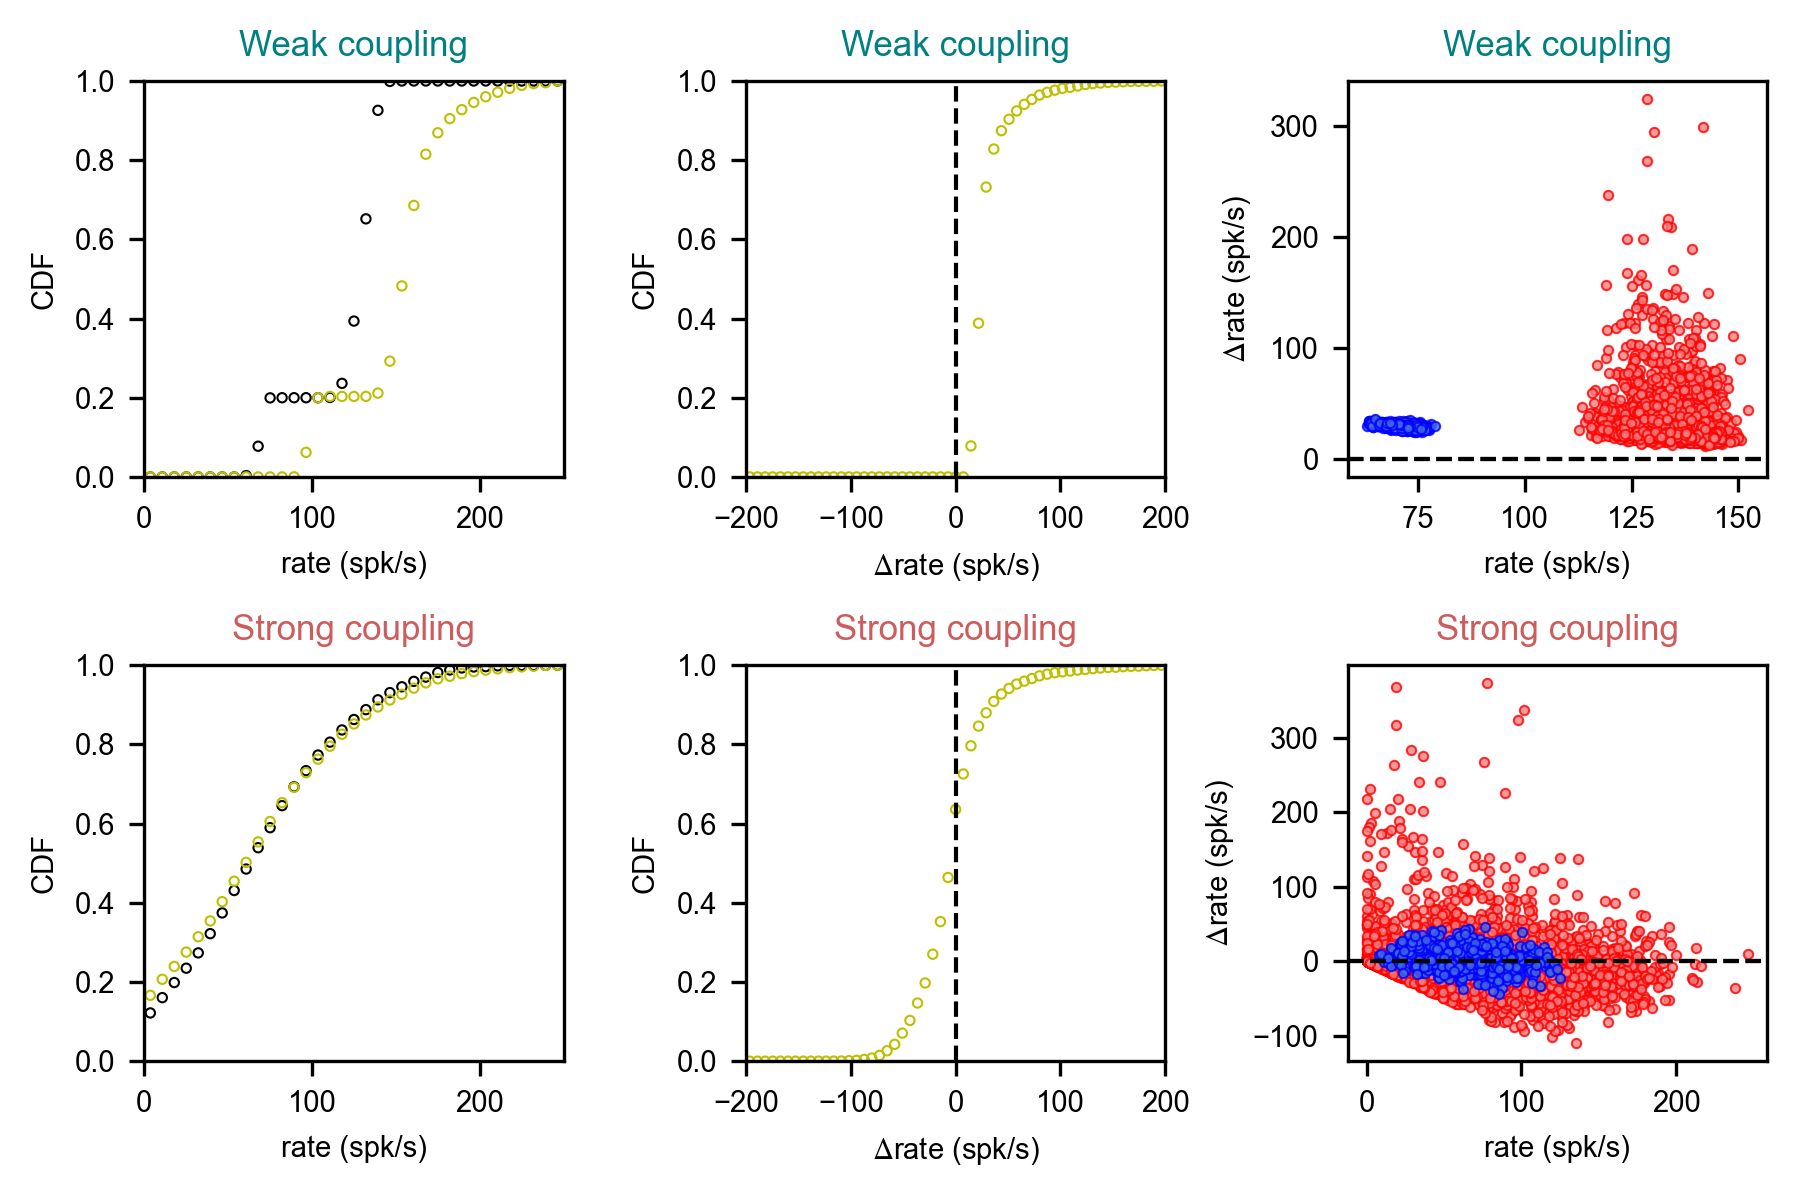

In [21]:
cols = 3
rows = 2
fig, axs = plt.subplots(rows,cols, figsize=(2*cols,2*rows), dpi=300, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .6, wspace=.3)

scatter_s = 5
scatter_w = 0.5

bin_edges=np.linspace(0,250,36)

for idx in range(4):
    if idx == 0:
        rates = w_rates[0][0,tune_idx]
    elif idx == 1:
        rates = w_rates[0][1,tune_idx]
    elif idx == 2:
        rates = s_rates[0][0,tune_idx]
    elif idx == 3:
        rates = s_rates[0][1,tune_idx]
    if idx < 2:
        plot_idx = 0
        title = 'Weak coupling'
        title_color = 'teal'
    else:
        plot_idx = 1
        title = 'Strong coupling'
        title_color = 'indianred'
    if idx%2 == 0:
        plot_color = 'k'
    else:
        plot_color = 'y'
    
    hist,_=np.histogram(rates,bin_edges)#,normed=True)
    bin_mean=0.5*(bin_edges[0:-1]+bin_edges[1::])
    spacings=np.diff(bin_edges)[0];
    hist=hist/np.sum(hist*spacings)
    axs[plot_idx,0].scatter(bin_mean,np.cumsum(spacings*hist),marker='o',facecolors='none',
                          edgecolors=plot_color,s=scatter_s,lw=scatter_w)
    axs[plot_idx,0].set_xlim(0,250)
    axs[plot_idx,0].set_ylim(0,1)
    axs[plot_idx,0].set_xlabel('rate (spk/s)')
    axs[plot_idx,0].set_ylabel('CDF')
    axs[plot_idx,0].set_title(title,color=title_color)

bin_edges=np.linspace(-200,200,56)

for idx in range(2):
    if idx == 0:
        rates = w_rates[0][1,tune_idx] - w_rates[0][0,tune_idx]
        title = 'Weak coupling'
        title_color = 'teal'
    elif idx == 1:
        rates = s_rates[0][1,tune_idx] - s_rates[0][0,tune_idx]
        title = 'Strong coupling'
        title_color = 'indianred'
    plot_idx = idx
    plot_color = 'y'
    
    hist,_=np.histogram(rates,bin_edges)#,normed=True)
    bin_mean=0.5*(bin_edges[0:-1]+bin_edges[1::])
    spacings=np.diff(bin_edges)[0];
    hist=hist/np.sum(hist*spacings)
    axs[plot_idx,1].scatter(bin_mean,np.cumsum(spacings*hist),marker='o',facecolors='none',
                          edgecolors=plot_color,s=scatter_s,lw=scatter_w)
#     axs[plot_idx,1].plot(bin_mean,np.cumsum(spacings*hist),'o',mfc='none',
#                           color=plot_color,ms=5)
    axs[plot_idx,1].set_xlim(-200,200)
    axs[plot_idx,1].set_ylim(0,1)
    axs[plot_idx,1].axvline(0,color='k',ls='--')
    axs[plot_idx,1].set_xlabel('$\Delta$rate (spk/s)')
    axs[plot_idx,1].set_ylabel('CDF')
    axs[plot_idx,1].set_title(title,color=title_color)

for idx in range(4):
    if idx == 0:
        base_rates = w_rates[0][0,tuneE_idx]
        delta_rates = w_rates[0][1,tuneE_idx] - w_rates[0][0,tuneE_idx]
    elif idx == 1:
        base_rates = w_rates[0][0,tuneI_idx]
        delta_rates = w_rates[0][1,tuneI_idx] - w_rates[0][0,tuneI_idx]
    elif idx == 2:
        base_rates = s_rates[0][0,tuneE_idx]
        delta_rates = s_rates[0][1,tuneE_idx] - s_rates[0][0,tuneE_idx]
    elif idx == 3:
        base_rates = s_rates[0][0,tuneI_idx]
        delta_rates = s_rates[0][1,tuneI_idx] - s_rates[0][0,tuneI_idx]
    if idx < 2:
        plot_idx = 0
        title = 'Weak coupling'
        title_color = 'teal'
    else:
        plot_idx = 1
        title = 'Strong coupling'
        title_color = 'indianred'
    if idx%2 == 0:
        plot_color = 'lightcoral'
        edge_color = 'r'
    else:
        plot_color = 'royalblue'
        edge_color = 'b'
    axs[plot_idx,2].scatter(base_rates[::2],delta_rates[::2],marker='o',facecolors=plot_color,
                          edgecolors=edge_color,alpha=0.8,s=scatter_s,lw=scatter_w)
    axs[plot_idx,2].axhline(0,color='k',ls='--')
    axs[plot_idx,2].set_xlabel('rate (spk/s)')
    axs[plot_idx,2].set_ylabel('$\Delta$rate (spk/s)')
    axs[plot_idx,2].set_title(title,color=title_color)
    
fig.tight_layout()
fig.savefig('./Figure_S5.pdf', bbox_inches='tight')